In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

data_path = "../data/raw/climate_nasa.csv"  # Adjust if needed
df = pd.read_csv(data_path)

df.head()


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [2]:

df.info()

df.isnull().sum()


df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


0

In [3]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
df.rename(columns={"text": "comment"}, inplace=True)
df.head()


,date,likescount,profilename,commentscount,comment
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


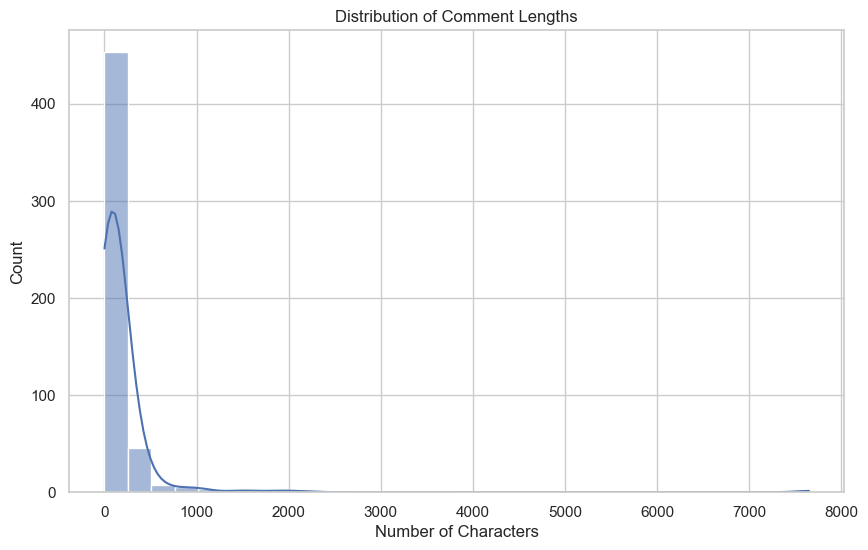

count     522.000000
mean      179.141762
std       519.944862
min         1.000000
25%        37.000000
50%        88.500000
75%       176.000000
max      7649.000000
Name: comment_length, dtype: float64

In [4]:
df["comment_length"] = df["comment"].astype(str).apply(len)

sns.histplot(df["comment_length"], bins=30, kde=True)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Number of Characters")
plt.show()

df["comment_length"].describe()


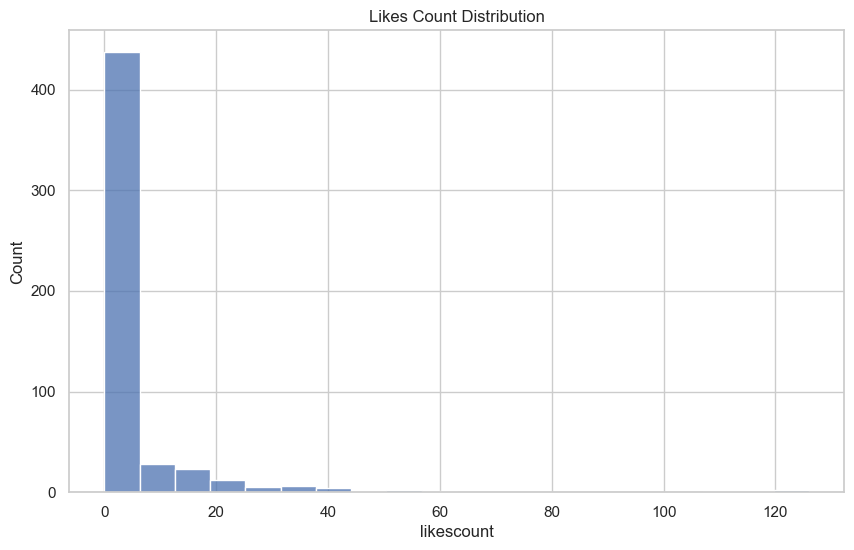

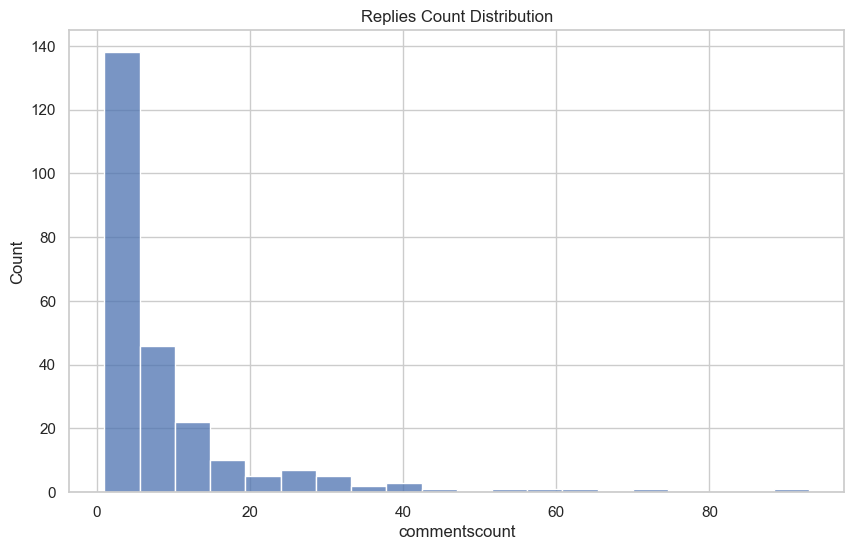

In [5]:
sns.histplot(df["likescount"], bins=20)
plt.title("Likes Count Distribution")
plt.show()

sns.histplot(df["commentscount"], bins=20)
plt.title("Replies Count Distribution")
plt.show()


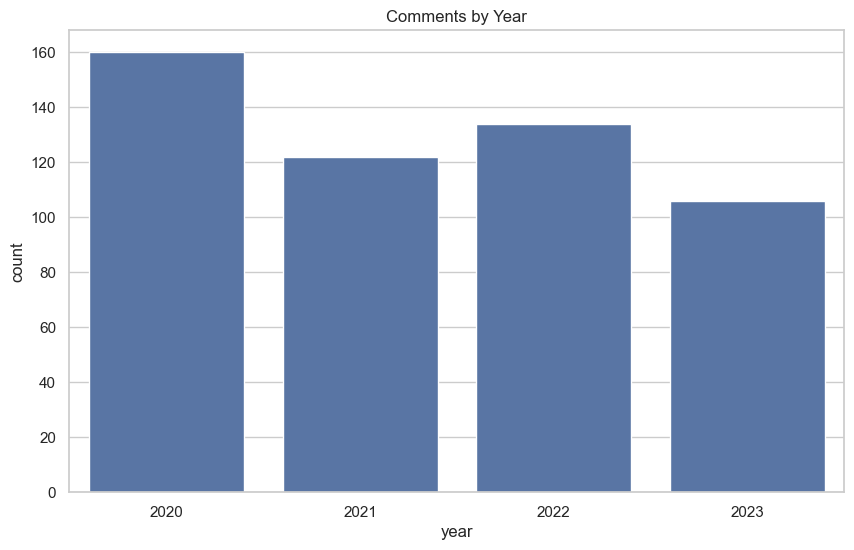

In [6]:
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Comment frequency by year
df["year"] = df["date"].dt.year
sns.countplot(x="year", data=df)
plt.title("Comments by Year")
plt.show()
